In [1]:
import os.path
import time
import numpy as np
from numpy import genfromtxt
import pandas as pd
%matplotlib inline

from functions import Functions

In [2]:
func = Functions()
from denmune import DenMuneCLS

#['K', 'ACC', 'F1', 'NMI', 'adj_NMI', 'adj_Rand', 'Homogeneity', 'Completeness' ])    
validity = {}
validity['acc'] = 1
validity['f1'] = 2
validity['nmi'] =3
validity['ami'] = 4
validity['ari'] = 5
validity['homo'] = 6
validity['comp'] = 7

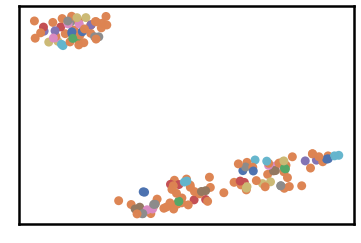

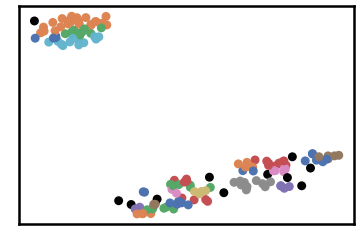

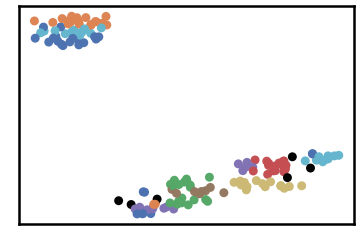

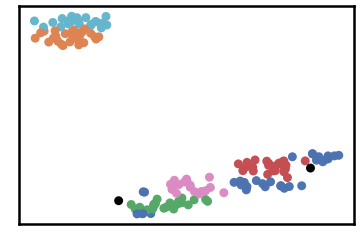

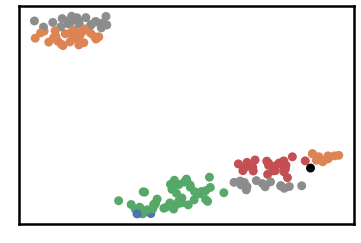

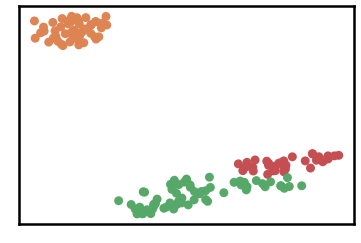

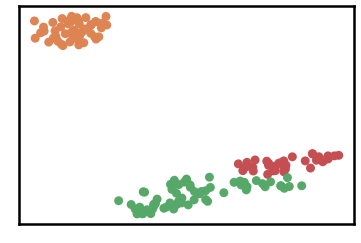

<Figure size 432x288 with 0 Axes>

In [3]:
myvalidity = 'f1'
alg_name = 'denmune'
myvalidity_idx = validity[myvalidity]

dataset = 'iris'
file_path = 'data/'

# DenMune works on a 2-d version of the original dimentional dataset.
#Anyway, DenMune can works on any n-d dataset but it attain its best results on a 2-d redused vsesion

file_2d = file_path + dataset + '-2d.txt'
if  not os.path.isfile(file_2d):
    func.generate_tsne(dataset, 2) 
    #this will generate a 2-d file of the tested dataset named dataset-2d.txt i.e. iris-2d.txt
    
    func.plot_clusters(data=data, labels=labels_true, alg_name='ground', dp_name=dataset +'-2d', show=False)



    
file_labels =  dataset +'-gt.txt' #dataset + '-gt.txt'
max_knn  = 50

start =1
step =1
end =  max_knn
labels_pred = []


file_save_pre = 'results/' + alg_name +'/csv/'  + alg_name
file_save = file_save_pre + '_para_'  + dataset + '.csv'

data = genfromtxt(file_path + dataset + '-2d'+ '.txt' , delimiter='\t')
labels_true = genfromtxt(file_path+file_labels)
labels_true = labels_true.astype(np.int64)


best_validity = -100
best_knn = -1


file_para = 'para_' + dataset + '.csv'
df = pd.DataFrame(columns =['K', 'ACC', 'F1', 'NMI', 'AMI', 'ARI','Homogeneity', 'Completeness', 'Time' ])

dp_dis = [] # it is a must to clear dp_dis before the loop


for n in range(start, end+1, step):


    solution_file = 'solution.txt'
    if  os.path.isfile(solution_file):
        os.remove(solution_file)

    start_time= time.time()
    py = DenMuneCLS(data=data, k_nearest=n, dp_dis=dp_dis, max_knn=max_knn)
    dp_dis = py.save_Dis()
    dp_data = py.save_Data()
    end_time= time.time()

    
    labels_pred = []
    labels_pred = genfromtxt(solution_file)
    labels_pred = func.match_Labels(labels_pred, labels_true)

    validity_index = func.calc_Metrics(labels_true, labels_pred)
    if (best_validity < validity_index[myvalidity_idx]):
        best_validity = validity_index[myvalidity_idx]
        best_knn = 'k= ' + str(n)
        func.plot_clusters(data=data, labels=labels_pred, alg_name=alg_name, dp_name=dataset, show=True)

    validity_index[0]  = str(n)
    validity_index[-1] = end_time-start_time

    df = df.append(pd.Series(validity_index, index=df.columns ), ignore_index=True)
    #df.sort_values(by=['ACC', 'NMI', 'ARI'] , ascending=False, inplace=True)   
    df.to_csv(file_save, index=False, sep='\t', header=True)

    print('loop ' + str(n)  + ' ' + myvalidity.upper() + ' is ' + str(validity_index[myvalidity_idx]) + ' THE best ' + myvalidity.upper() + ' is ' + str(best_validity) + " at KNN = " + str(best_knn) + '   ', end='')            
    func.backline()

df.to_csv(file_save, index=False, sep='\t', header=True)


In [4]:
labels_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
labels_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [6]:
df

,K,ACC,F1,NMI,AMI,ARI,Homogeneity,Completeness,Time
0,1,23,0.128852,0.310490,0.155043,0.013065,0.535831,0.218571,0.013169
1,2,8,0.069264,0.367250,0.271934,0.054242,0.734660,0.244816,0.002824
2,3,33,0.349594,0.460708,0.405330,0.147566,0.876537,0.312472,0.003656
3,4,45,0.456302,0.515285,0.488013,0.245284,0.856321,0.368519,0.004127
4,5,75,0.665578,0.665848,0.652953,0.456992,0.953145,0.511632,0.005148
5,6,97,0.770310,0.703955,0.693105,0.595208,0.924045,0.568539,0.005095
6,7,94,0.695652,0.647586,0.638045,0.493241,0.786923,0.550169,0.065804
7,8,115,0.814365,0.723120,0.718269,0.609743,0.786923,0.668886,0.006166
8,9,103,0.749901,0.680431,0.673275,0.543318,0.786923,0.599325,0.006643
9,10,135,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.007962
